# Parcial 1

Esteban Emmanuel Ortiz Morales

Droguerías Los Alpes es una cadena de droguerías con más de mil sucursales en
diferentes países de Latinoamérica y El Caribe. Con el objetivo de lograr una mejor
gestión de la cadena de suministros, el área operativa de Droguerías Los Alpes desea
explorar nuevos mecanismos para estimar las ventas en las diferentes sucursales, las
cuales están influenciadas por muchos factores como el tipo de la sucursal, el nivel de
surtido de sus productos, la competencia, el día de la semana, si es día festivo, las
promociones y la estacionalidad.

Como científico de datos de Droguerías Los Alpes, su tarea es validar el uso de técnicas
de machine learning que apoyen la toma de decisiones del equipo de operaciones a partir
de las ventas que se puedan predecir para una sucursal en un día particular del año.

Para este propósito le han compartido dos conjuntos de datos: (1) el histórico de ventas
de las diferentes sucursales para el periodo de enero del 2013 a julio del 2015, y (2) las
características correspondientes a cada sucursal. Adicionalmente, le han compartido el
diccionario de datos correspondiente.


# Librerías

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

# Diccionario de datos

### Tabla de datos de sucursales

| Campo | Descripción |
|---|---|
| Store | Identificador de la sucursal |
| StoreType | Tipo de sucursal (a, b, c, d) |
| Assortment | Nivel de inventario (a = básica, b = extra, c = extendida) |
| CompetitionDistance | Distancia al competidor más cercano |
| CompetitionOpenSinceMonth | Mes de apertura del competidor |
| CompetitionOpenSinceYear | Año de apertura del competidor |
| Promo2 | Indica si hay una promoción permanente |
| Promo2SinceWeek | Indica la semana del año en la que la promoción permanente inició |
| Promo2SinceYear | Indica el año en el que la promoción permanente inició |
| PromoInterval | Indica los meses del año en los que la promoción permanente está activa |

### Tabla de datos de ventas

| Campo | Descripción |
|---|---|
| Store | Identificador de la sucursal |
| DayOfWeek | Día de la semana |
| Date | Fecha del reporte de ventas |
| Sales | Total de ventas reportadas |
| Customers | Total de clientes reportados |
| Open | Indica si la sucursal abrió ese día |
| Promo | Indica si la sucursal tuvo una promoción del día (diferente a Promo2) |
| StateHoliday | Indica si la fecha es un feriado estatal |
| SchoolHoliday | Indica si la fecha es un feriado escolar |

# Carga de datos

In [2]:
sales = pd.read_csv('sales_history.csv')
stores = pd.read_csv('stores.csv')

C:\Users\esteb\AppData\Local\Temp\ipykernel_13960\1616600941.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv('sales_history.csv')


In [3]:
# Imprimimos dtypes
print(sales.dtypes)


# Observamos los datos
sales.head()

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,3,2014-12-31,2605,327,1,0,0,1
1,2,3,2014-12-31,2269,252,1,0,0,1
2,3,3,2014-12-31,3804,408,1,0,0,1
3,4,3,2014-12-31,10152,1311,1,0,0,1
4,5,3,2014-12-31,1830,217,1,0,0,1


In [4]:
# Imprimimos dtypes
print(stores.dtypes)


# Observamos los datos
stores.head()

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# Unión de datasets

Particularmente ambos datasets comparten el identificador de la tienda el común. Al unirlos podemos tener con conjunto de datos que tenga tanto las características de la tienda como las ventas que se realizaron en ella. Al tener los datos de esta forma, el análsis resulta mucho más enriquecedor.

In [5]:
merged_data = pd.merge(sales, stores, on='Store')

In [6]:
# Revisamos un ejemplo de los datos
merged_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,3,2014-12-31,2605,327,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,2,2014-12-30,6466,703,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,1,2014-12-29,6463,700,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,7,2014-12-28,0,0,0,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,6,2014-12-27,6057,684,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


# Análisis exploratorio y de calidad de datos

In [7]:
# Observamos la forma de los datso
print("Forma de nusetro dataset: ", merged_data.shape)

Forma de nusetro dataset:  (373855, 18)


In [8]:
# Observemos las columnas de nuestro dataset y sus tipos de datos
print("Columnas y tipos de datos de nuestro dataset: ", merged_data.dtypes)

Columnas y tipos de datos de nuestro dataset:  Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object


In [9]:
# Revisamos las estadísticas descriptivas de las variables numéricas
descriptive_stats = merged_data.describe()
print(descriptive_stats)

               Store      DayOfWeek          Sales      Customers  \
count  373855.000000  373855.000000  373855.000000  373855.000000   
mean      559.170379       3.998462    5833.290704     643.268034   
std       321.969593       1.998125    3883.887435     471.002522   
min         1.000000       1.000000       0.000000       0.000000   
25%       282.000000       2.000000    3760.000000     413.000000   
50%       559.000000       4.000000    5794.000000     619.000000   
75%       839.000000       6.000000    7941.000000     850.000000   
max      1115.000000       7.000000   38037.000000    5494.000000   

                Open          Promo  SchoolHoliday  CompetitionDistance  \
count  373855.000000  373855.000000  373855.000000        372944.000000   
mean        0.830314       0.381913       0.186201          5473.399465   
std         0.375357       0.485856       0.389269          7809.850736   
min         0.000000       0.000000       0.000000            20.000000   
25%

In [10]:
# Observemos los valores nulos de nuestro dataset
null_values = merged_data.isnull().sum()
print(null_values)

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance             911
CompetitionOpenSinceMonth    119090
CompetitionOpenSinceYear     119090
Promo2                            0
Promo2SinceWeek              194144
Promo2SinceYear              194144
PromoInterval                194144
dtype: int64


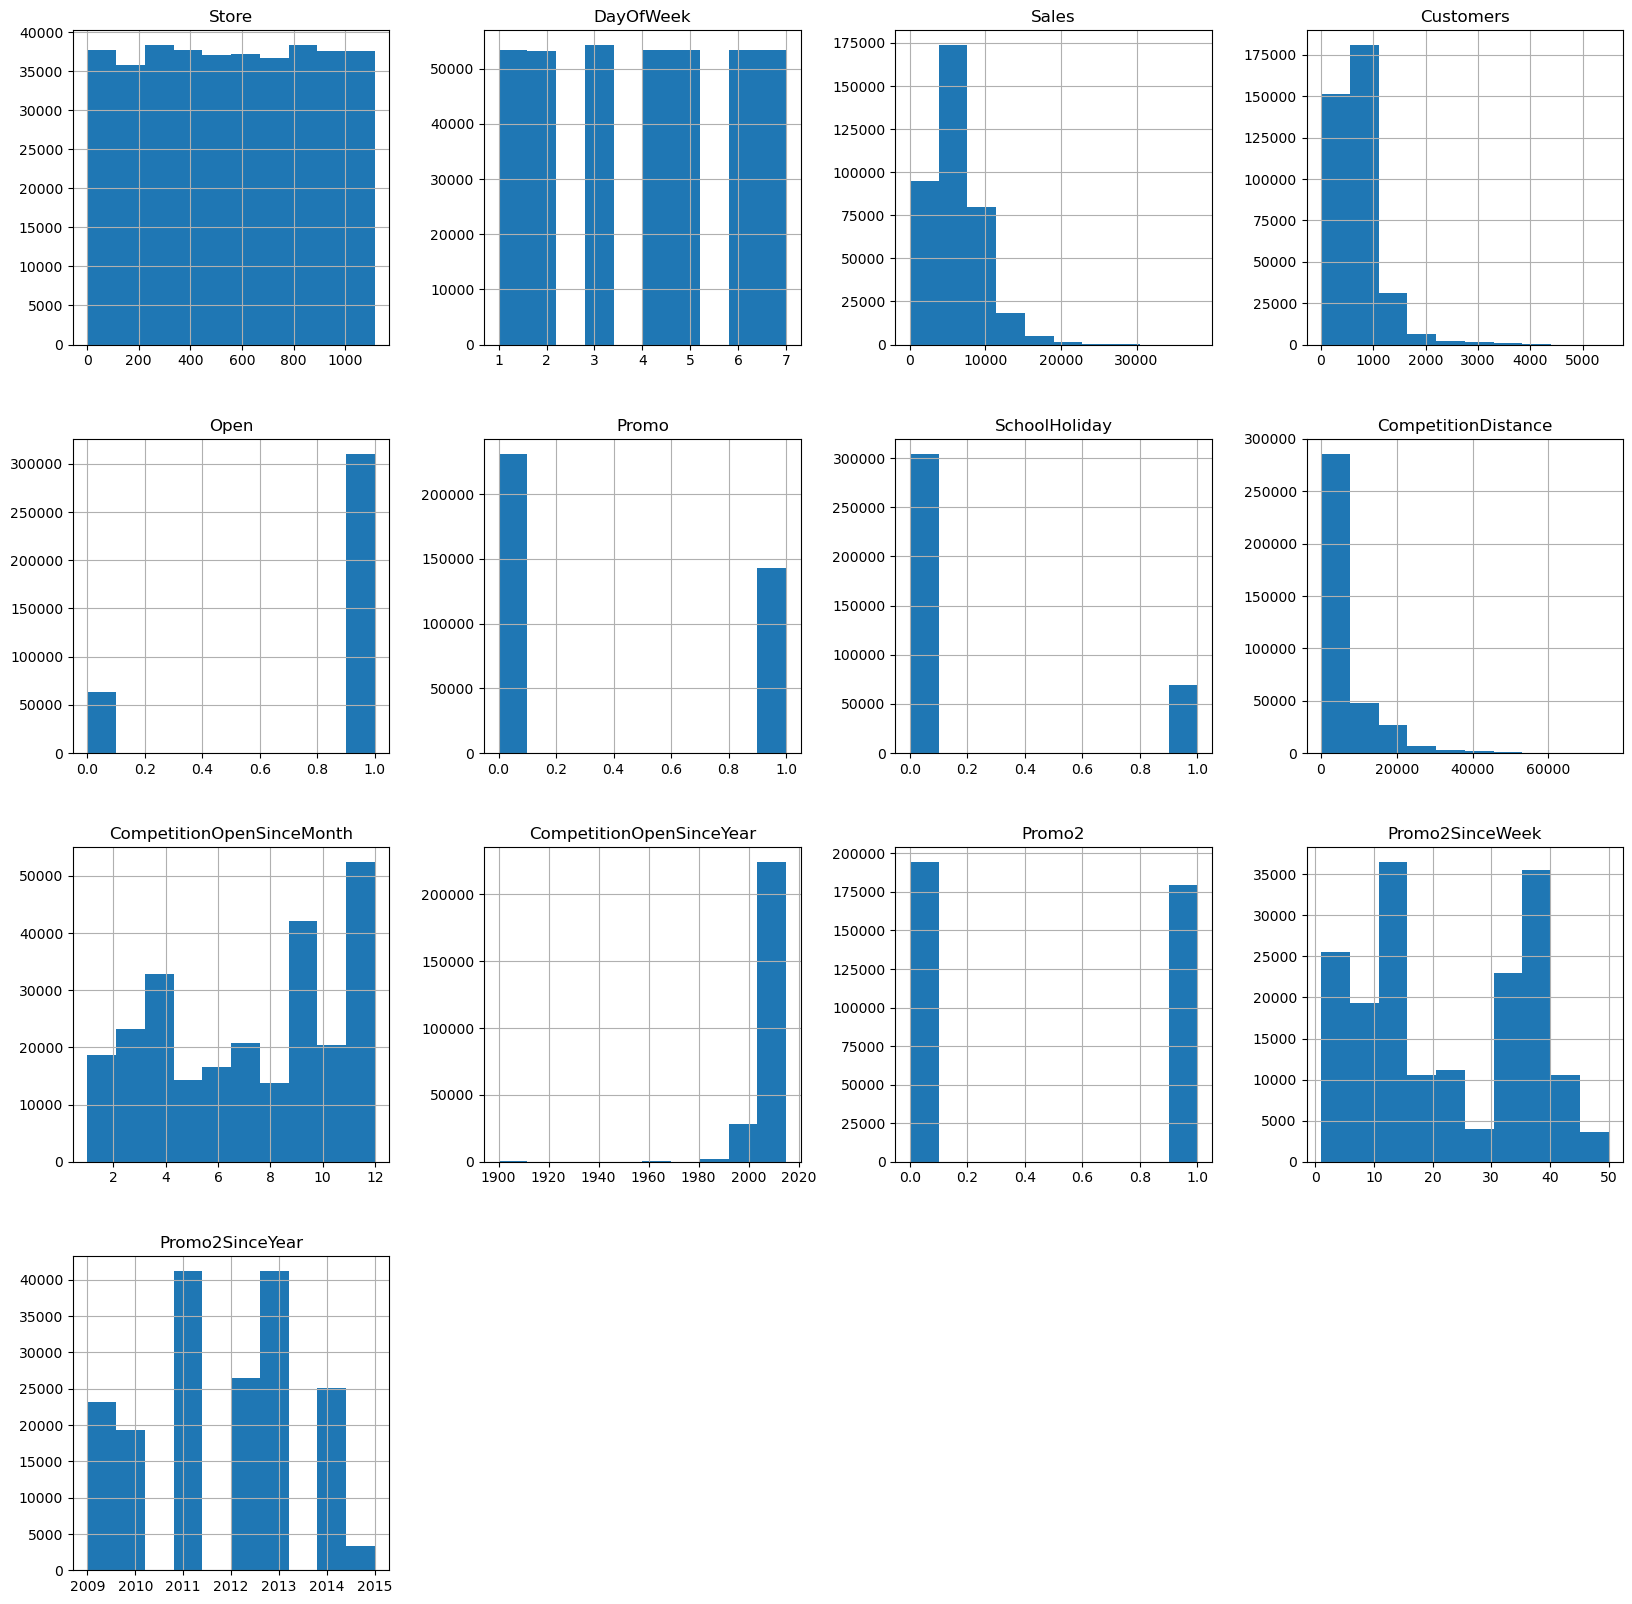

In [11]:
# Observemos la distribución de los datos a través de histogramas
merged_data.hist(figsize=(20, 20))
plt.show()

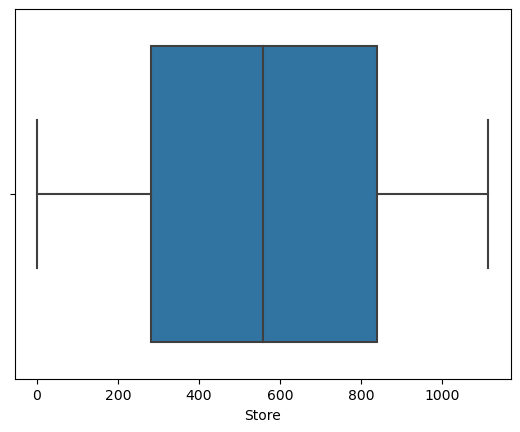

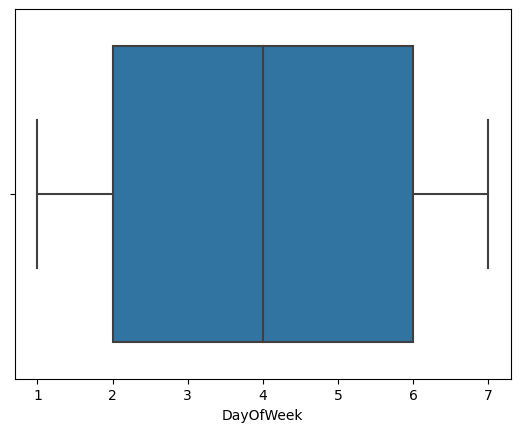

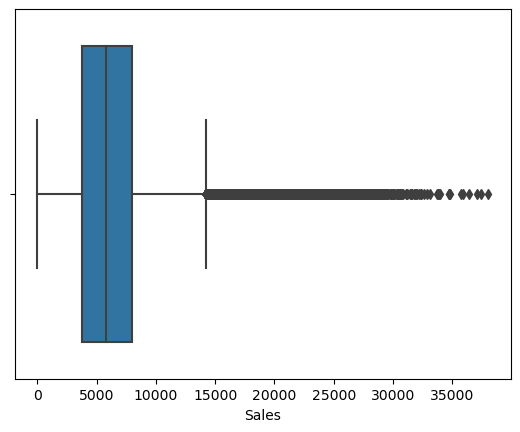

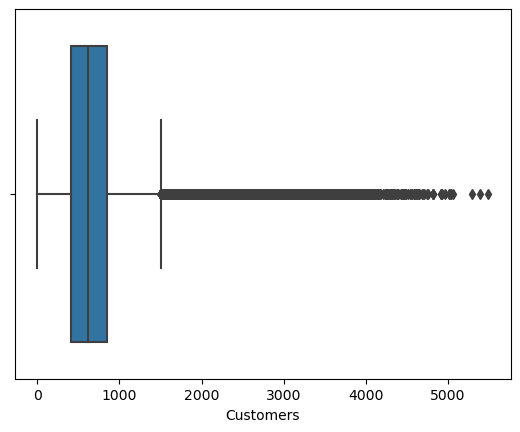

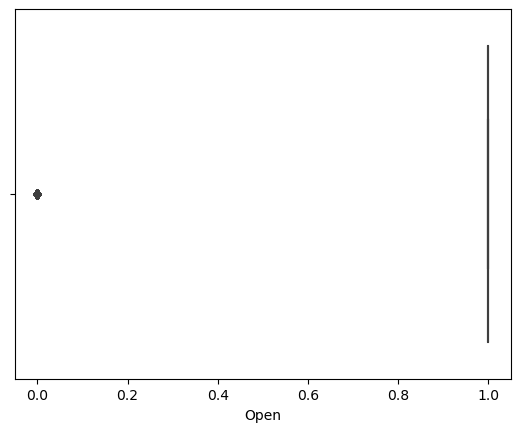

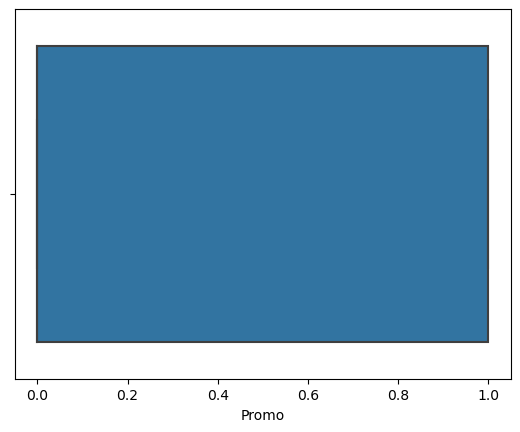

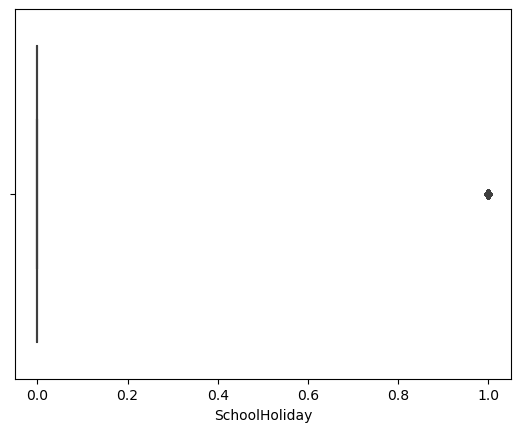

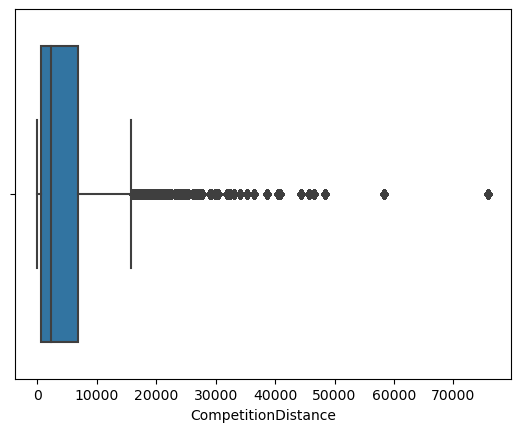

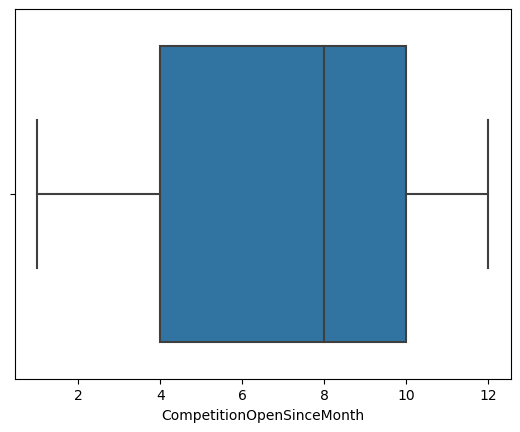

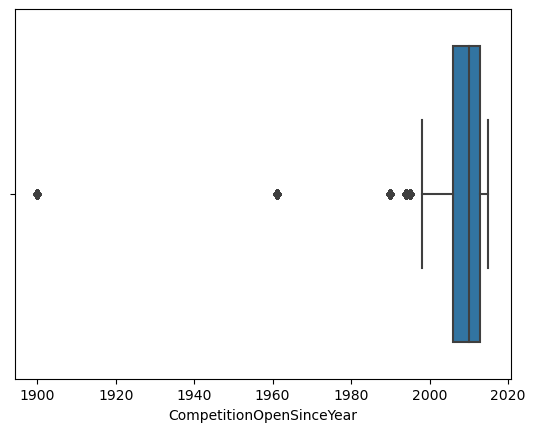

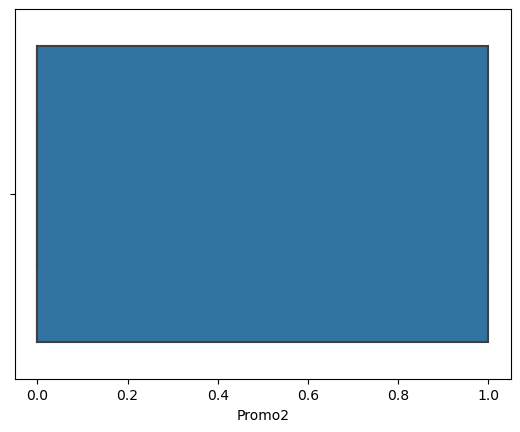

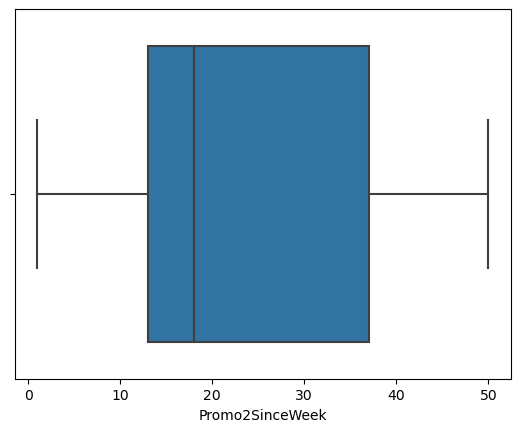

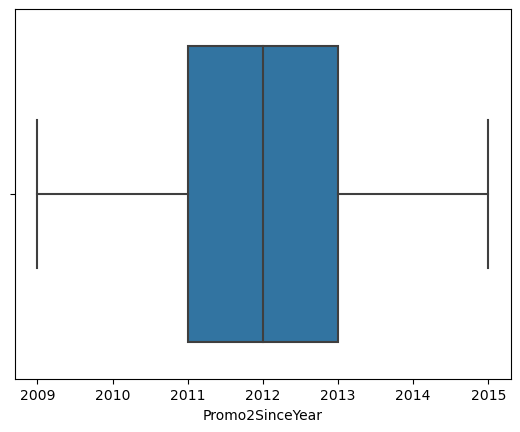

In [12]:
# Boxplots para identificar outliers
for column in merged_data.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(x=merged_data[column])
    plt.show()

<AxesSubplot:>

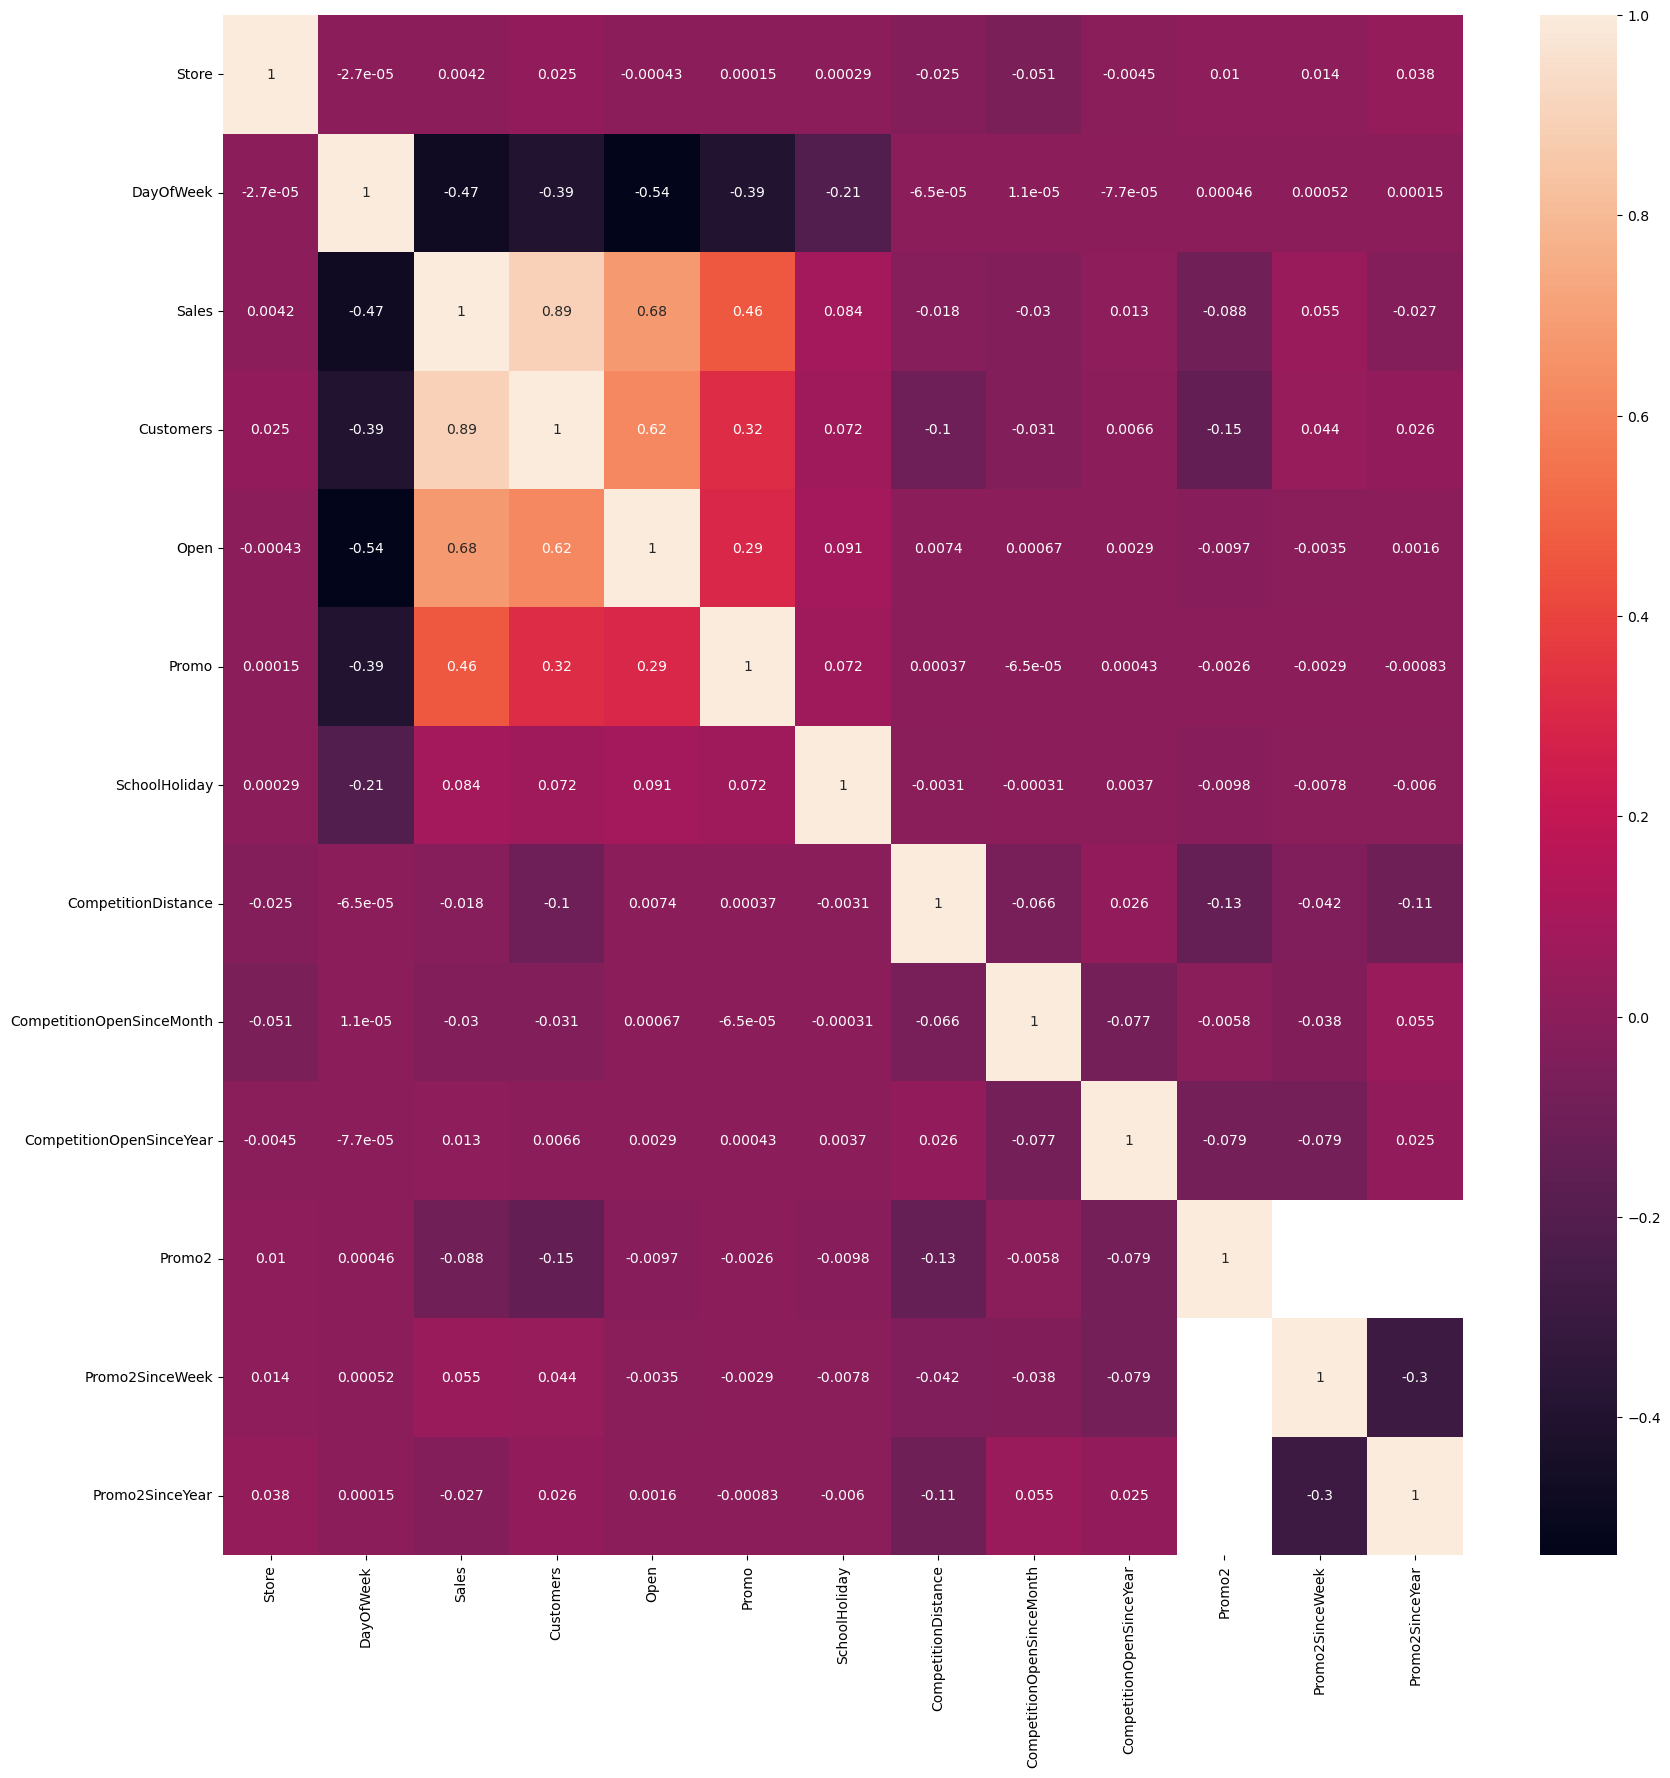

In [13]:
# Finalmente haremos análisis bivariado. Inicialmente revisaremos la matriz de correlación con SNS
corr_matrix = merged_data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True)

Finalmente haremos un análisis bivariado más específico para responder a la siguiente pregunta:

**¿Qué tanto varían las ventas dependiendo del
mes o del día de la semana, así como del nivel de surtido de la sucursal?**

In [14]:
# Lo más sencillo. Es cambiar el tipo de la columna ventas a DateTime
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

In [15]:
# En principio haremos una gráfica en la que se muestren las ventas por Día de la semana. 
# Así que de todos los lunes del año de hará una sumatoria de sus valores para tener el valor real.
# Lo mismo para el resto de días de la semana
merged_data['Day'] = merged_data['Date'].dt.day_name()

# De la misma manera se hará con los meses
merged_data['Month'] = merged_data['Date'].dt.month_name()

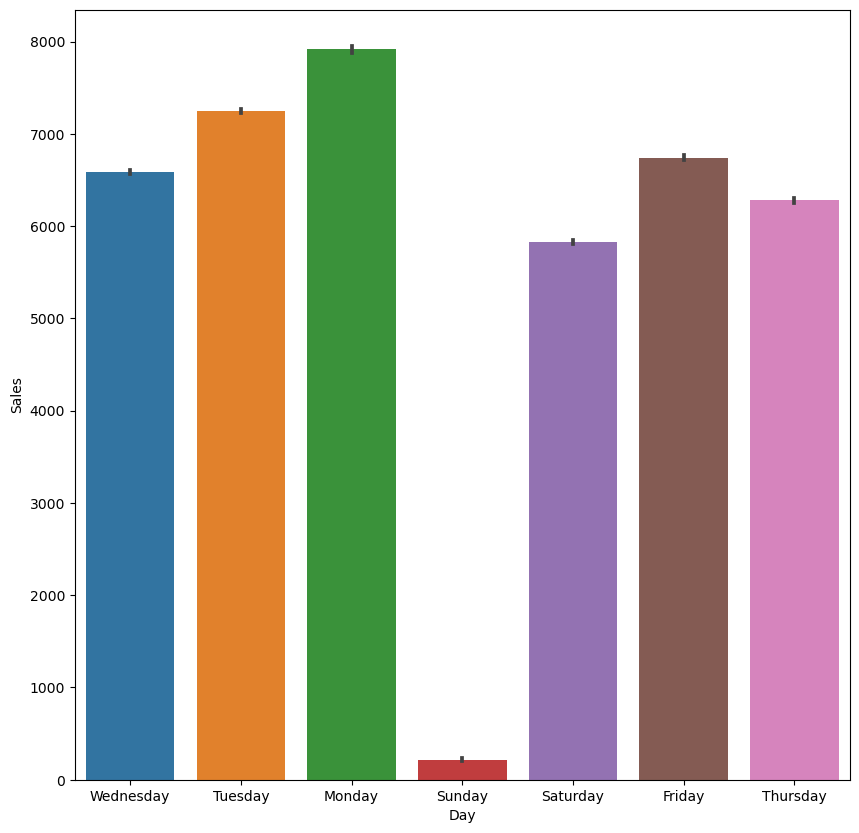

In [16]:
# Ahora pasaremos a hacér gráficas de barras para ver la distribución de las ventas por día de la semana
plt.figure(figsize=(10, 10))
sns.barplot(x='Day', y='Sales', data=merged_data)
plt.show()

Días de la semana organizados por promedio de ventas:
- Miercoles
- Martes
- Viernes
- Lunes
- Sabado
- Domingo: Este con diferencia es el día con más pocas ventas

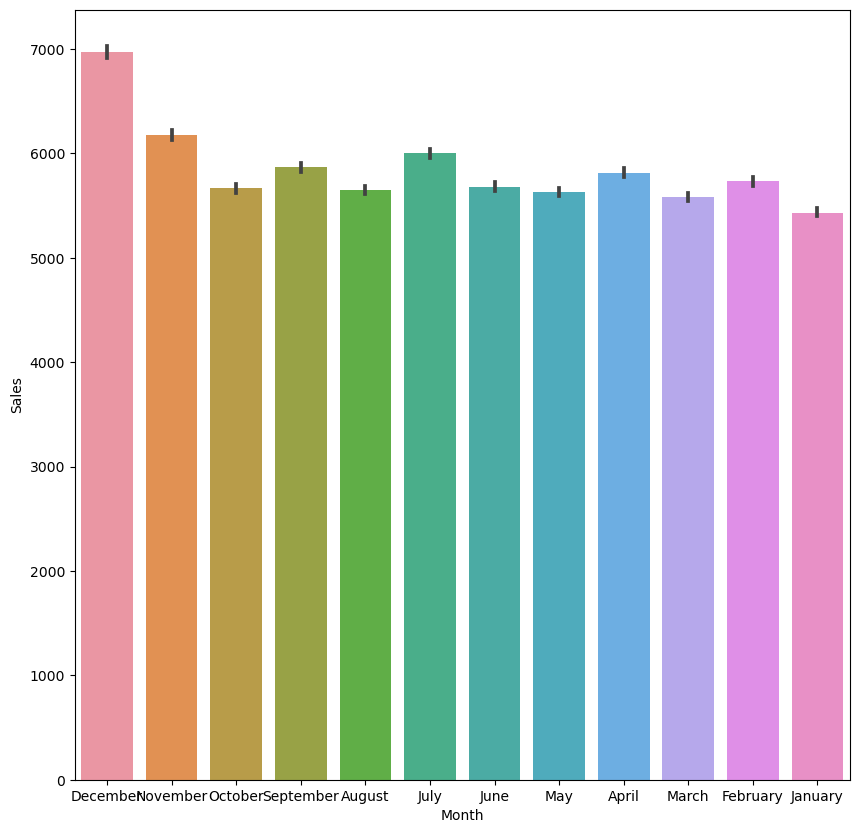

In [17]:
# Es momento de observar las gráficas por mes
plt.figure(figsize=(10, 10))
sns.barplot(x='Month', y='Sales', data=merged_data)
plt.show()

Podríamos decir que durante la mayor parte del año las ventas son constantes. Sin embargo diciembre está difereciado de los demás siendo el mes con más ventas. Enero por su parte es el mes con menos ventas.

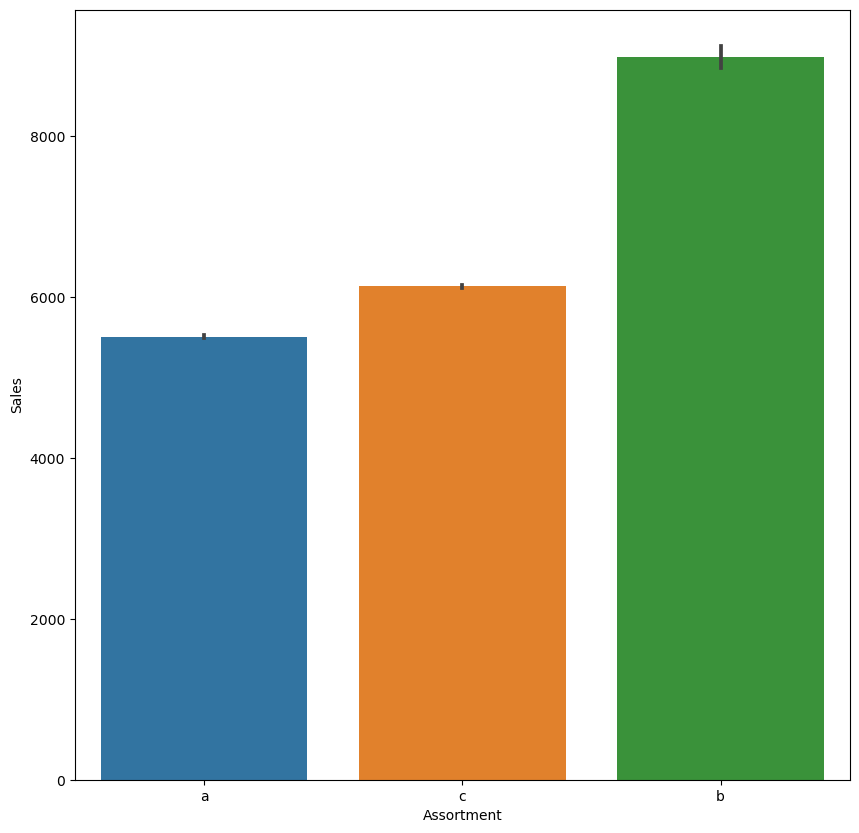

In [18]:
# Nivel de surtido de la sucursal vs ventas
# Assortment: Describe an assortment level: a = basic, b = extra, c = extended. 

plt.figure(figsize=(10, 10))
sns.barplot(x='Assortment', y='Sales', data=merged_data)
plt.show()

Con una diferencia considerable el nivel de surtido de la tienda afecta las ventas. Las tiendas con surtido extra son las que más venden, seguidas de las tiendas con surtido extendido y finalmente las tiendas con surtido básico.

# Limpieza y preparación de datos

In [19]:
# Vale la pena imputar valores? observemos el PORCENTAJE DE valores nulos de las columnas
null_values = merged_data.isnull().sum()

null_values_percent = null_values / merged_data.shape[0] * 100

print(null_values_percent)

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.243677
CompetitionOpenSinceMonth    31.854596
CompetitionOpenSinceYear     31.854596
Promo2                        0.000000
Promo2SinceWeek              51.930294
Promo2SinceYear              51.930294
PromoInterval                51.930294
Day                           0.000000
Month                         0.000000
dtype: float64


In [20]:
# En el análisis de calidad de datos pudimos ver que las columnas:
# CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear, PromoInterval
# Tenían valores muchos nulos. Con mayor exactitud, más del 30% de los datos eran nulos en todos los casos.
# Por regla general los vamos a eliminar ya que imputar tal magnitud de datos no tiene sentido.
merged_data = merged_data.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'], axis=1)

# Ahora bien existe otra columna que tiene valores nulos pero esta es manejable. Estamos hablando de CompetitionDistance.
# El diccionario de datos nos dice que se refiere a la distancia del competidor más cercano. 
# Por lo que en este caso cambiar los valores nulos por la media es una opción viable.
merged_data['CompetitionDistance'] = merged_data['CompetitionDistance'].fillna(merged_data['CompetitionDistance'].mean())

In [21]:
# Nuevamente observamos los porcentajes de valores nulos
null_values = merged_data.isnull().sum()
null_values_percent = null_values / merged_data.shape[0] * 100
print(null_values_percent)

Store                  0.0
DayOfWeek              0.0
Date                   0.0
Sales                  0.0
Customers              0.0
Open                   0.0
Promo                  0.0
StateHoliday           0.0
SchoolHoliday          0.0
StoreType              0.0
Assortment             0.0
CompetitionDistance    0.0
Promo2                 0.0
Day                    0.0
Month                  0.0
dtype: float64


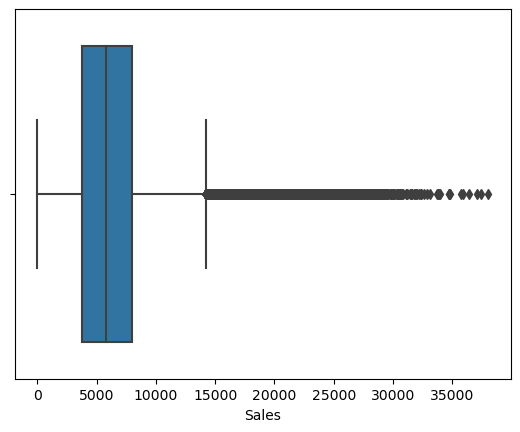

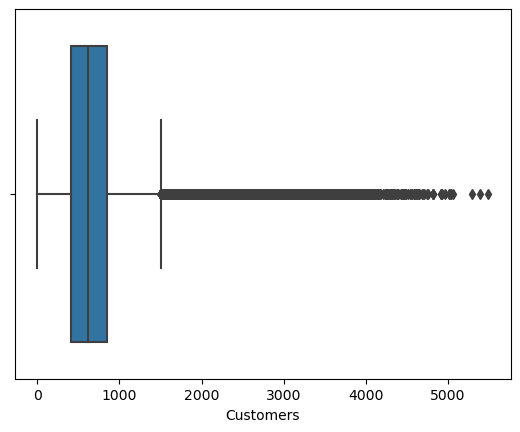

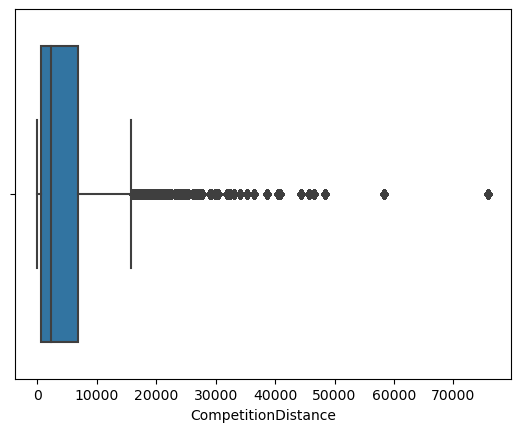

In [22]:
# Perfecto. Ahora vamos a lidiar con los outliers.

# El análisis de datos nos hizo darnos cuenta de que hay outliers significativos en sales, customers y competition distance. Observemoslos una vez más
for column in merged_data[['Sales', 'Customers', 'CompetitionDistance']].columns:
    sns.boxplot(x=merged_data[column])
    plt.show()

In [23]:
# Vamos a implementar la estrategía de eliminación de outliers de IQR para dichas columnas. 
# Eliminar outliers es beneficioso para nuestro modelo pues estos valores pueden generar ruido que afecte el desempeño del mismo.

# Sales
q1 = merged_data['Sales'].quantile(0.25)
q3 = merged_data['Sales'].quantile(0.75)

iqr = q3 - q1

tamanio_antes = merged_data.shape[0]

merged_data = merged_data[(merged_data['Sales'] > (q1 - 1.5 * iqr)) & (merged_data['Sales'] < (q3 + 1.5 * iqr))]

tamanio_despues = merged_data.shape[0]

print("Tamaño antes de eliminar outliers: ", tamanio_antes)
print("Tamaño después de eliminar outliers: ", tamanio_despues)
print("Eliminanos el ", (tamanio_antes - tamanio_despues) / tamanio_antes * 100, "% de los datos")


print()

# Customers

q1 = merged_data['Customers'].quantile(0.25)
q3 = merged_data['Customers'].quantile(0.75)

iqr = q3 - q1

tamanio_antes = merged_data.shape[0]

merged_data = merged_data[(merged_data['Customers'] > (q1 - 1.5 * iqr)) & (merged_data['Customers'] < (q3 + 1.5 * iqr))]

tamanio_despues = merged_data.shape[0]

print("Tamaño antes de eliminar outliers: ", tamanio_antes)

print("Tamaño después de eliminar outliers: ", tamanio_despues)

print("Eliminanos el ", (tamanio_antes - tamanio_despues) / tamanio_antes * 100, "% de los datos")

print()

Tamaño antes de eliminar outliers:  373855
Tamaño después de eliminar outliers:  364103
Eliminanos el  2.6084979470650382 % de los datos

Tamaño antes de eliminar outliers:  364103
Tamaño después de eliminar outliers:  355784
Eliminanos el  2.284793039332277 % de los datos



In [24]:
# En este último casos debemos tener aún más cuidado por que se intentó hacer una eliminación de IQR pero se eliminaron casí el 10% de los datos.
# Por ello lo se hará una nueva aproximación en donde se eliminarán los valores que estén por encima del percentil 98.

q95 = merged_data['CompetitionDistance'].quantile(0.98)

tamanio_antes = merged_data.shape[0]

merged_data = merged_data[merged_data['CompetitionDistance'] < q95]

tamanio_despues = merged_data.shape[0]

print("Tamaño antes de eliminar outliers: ", tamanio_antes)

print("Tamaño después de eliminar outliers: ", tamanio_despues)

print("Eliminanos el ", (tamanio_antes - tamanio_despues) / tamanio_antes * 100, "% de los datos")

Tamaño antes de eliminar outliers:  355784
Tamaño después de eliminar outliers:  348663
Eliminanos el  2.0014952892766398 % de los datos


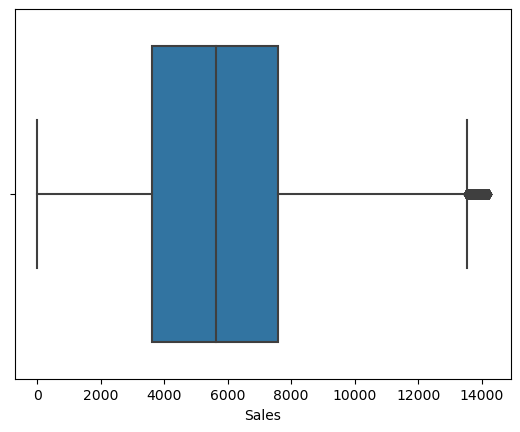

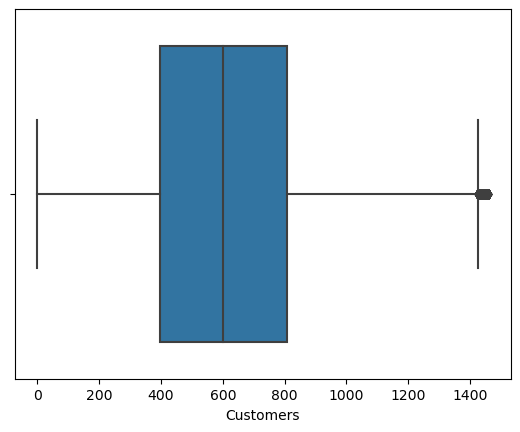

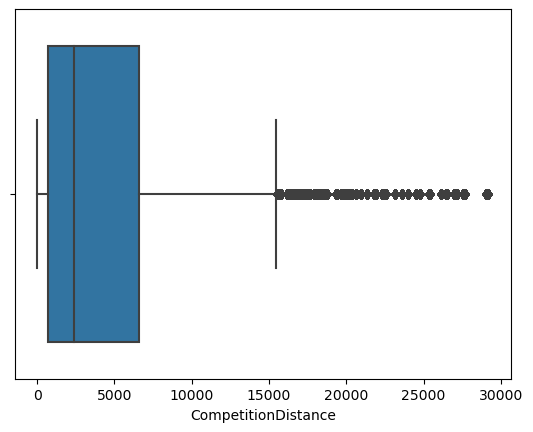

In [25]:
# Volvamos a observar los boxplots para ver los outputs de los outliers
for column in merged_data[['Sales', 'Customers', 'CompetitionDistance']].columns:
    sns.boxplot(x=merged_data[column])
    plt.show()

In [26]:
# Perfecto. Ahora la siguiente estratégia. Y enfocada en nuestro problema (Predicción de ventas en una regresión lineal). 
# Vamos a eliminar aquellas columnas que no tengan una correlación de mínimo cierto umbral con la variable objetivo (Sales).
# En este caso nuestro umbral es 10%.
# Para ello realizaremos la siguiente aproximación:

def remove_low_correlation(df, threshold=0.1, target='Sales'):
    # Calcular la correlación de cada variable con la variable objetivo
    correlations_with_target = df.corr()[target].abs()
    
    # Encontrar las columnas con correlación por debajo del umbral
    cols_to_drop = correlations_with_target[correlations_with_target < threshold].index
    
    # Eliminar estas columnas del DataFrame
    df_cleaned = df.drop(cols_to_drop, axis=1)
    
    return df_cleaned
    
new_data = remove_low_correlation(merged_data, threshold=0.1)

print("Columnas eliminadas: ", set(merged_data.columns) - set(new_data.columns))

merged_data = new_data

print("Correlaciones resultantes: ", merged_data.corr()["Sales"].abs().sort_values(ascending=False))

Columnas eliminadas:  {'Store', 'CompetitionDistance', 'Promo2', 'SchoolHoliday'}
Correlaciones resultantes:  Sales        1.000000
Customers    0.914267
Open         0.759332
DayOfWeek    0.516879
Promo        0.491611
Name: Sales, dtype: float64


In [27]:
# De la misma manera una regresión lineal no recomienda tener variables independientes altamente correlacionadas entre si. 
# Por ello implementaremos una función de la siguiente manera:

# Función para eliminar variables con alta correlación entre si. Conservamos una de las dos variables. El umbral es 65%.
# La variable objetivo no debe eliminarse. incomeperperson
def remove_highly_correlated(df, threshold=0.65, target='Sales'):
    # Calcular la matriz de correlación excluyendo la columna objetivo
    correlation_matrix = df.drop(target, axis=1).corr().abs()
    
    # Obtener los pares de variables correlacionadas y la correlación con la variable objetivo
    correlated_pairs = {}
    cols_to_drop = set()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if correlation_matrix.iloc[i, j] >= threshold:
                colname_i = correlation_matrix.columns[i]
                colname_j = correlation_matrix.columns[j]
                correlated_pairs[(colname_i, colname_j)] = correlation_matrix.iloc[i, j]
    
    # Determinar cuál variable del par tiene menor correlación con la variable objetivo y marcar para eliminación
    for pair, corr_value in correlated_pairs.items():
        corr_with_target_i = df[pair[0]].corr(df[target])
        corr_with_target_j = df[pair[1]].corr(df[target])
        if abs(corr_with_target_i) < abs(corr_with_target_j):
            cols_to_drop.add(pair[0])
        else:
            cols_to_drop.add(pair[1])
    
    # Eliminar las columnas marcadas
    df_cleaned = df.drop(cols_to_drop, axis=1)
    
    return df_cleaned
    

new_data = remove_highly_correlated(merged_data)

print("Columnas eliminadas: ", set(merged_data.columns) - set(new_data.columns))

merged_data = new_data

Columnas eliminadas:  {'Open'}


In [28]:
# Finalmente por como funciona un modelo de regresión lineal debemos decidir hacer algo con las variables categóricas
# pues estas no pueden ser interpretadas por el modelo. Para ello primero veremos cuales son

print("Variables categóricas: ", merged_data.select_dtypes(include=['object', 'datetime64']).columns)

Variables categóricas:  Index(['Date', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'Month'], dtype='object')


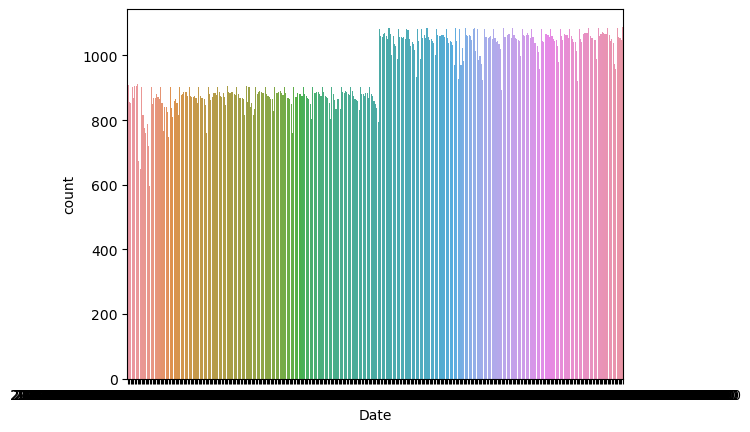

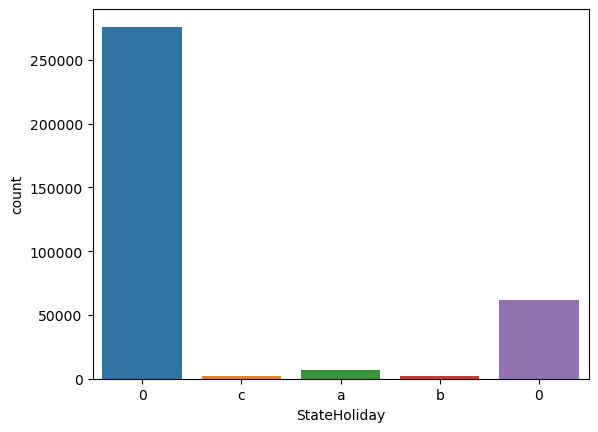

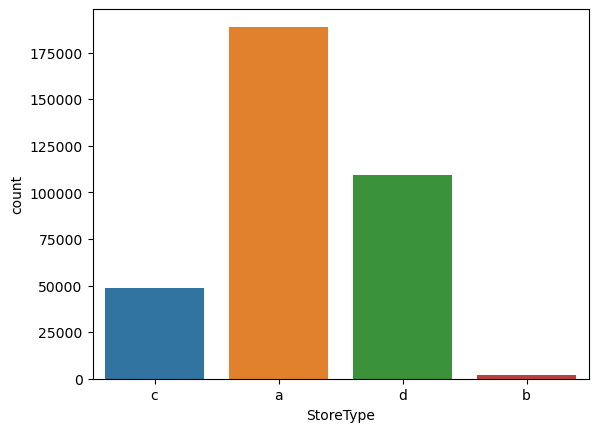

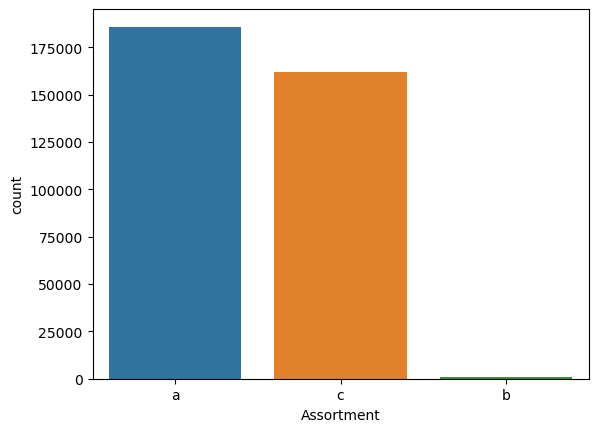

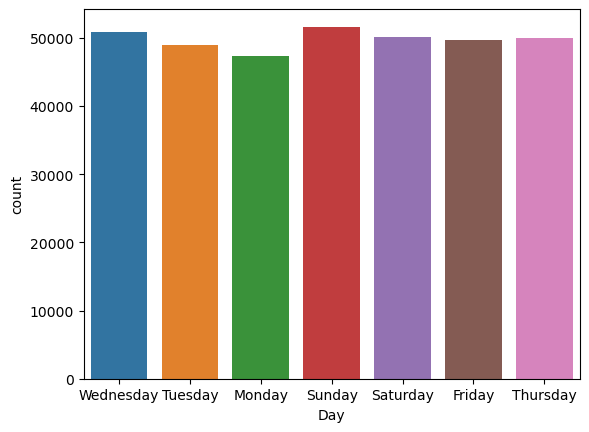

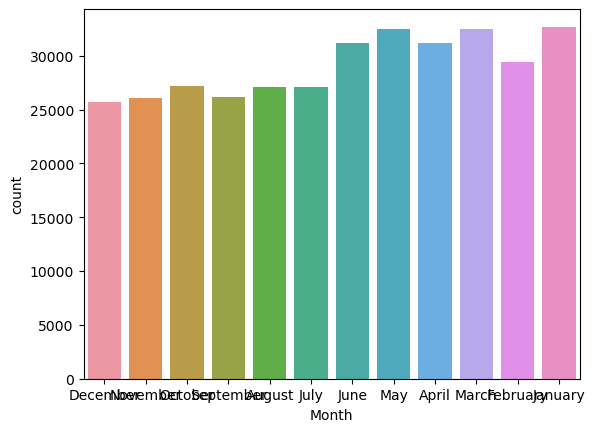

In [29]:
var_cate = merged_data.select_dtypes(include=['object', 'datetime64']).columns
# Veamos las distribuciones de estas variables categoricas
for column in var_cate:
    sns.countplot(x=column, data=merged_data)
    plt.show()

In [30]:
# En el caso de date no tiene sentido conservarla. Aunque columnas como día de la semana pueden llegar a ser interesantes.
# En el caso de stateholyday, tambien hay un desbalanceo muy grande entre los valores. Por lo que se eliminará
# Store type puede llegar a ser una variable importante que nos ayude a explicar las ventas. Por lo que se conservará. Aunque Tiene un ligero desbalance en su clase d
# Finalmente Assortment tambien puede llegar a ser importante. Por lo que se conservará. Aunque Tiene un ligero desbalance en su clase B

# Agregar año
merged_data['Year'] = merged_data['Date'].dt.year

# Eliminar
merged_data = merged_data.drop(['Date', 'StateHoliday'], axis=1)
merged_data = merged_data.drop(['DayOfWeek'], axis=1)

# Ahora vamos a hacer un one hot encoding de las variables categóricas que conservamos
merged_data = pd.get_dummies(merged_data, columns=['StoreType'], drop_first=True)
# En el caso de assortment podemos volverla ordinal. siendo a = 1, b = 2, c = 3 (basico, extra, extendido)
merged_data['Assortment'] = merged_data['Assortment'].map({'a': 1, 'b': 2, 'c': 3})
# Para días de la semana lo mejor es hacer un one hot encoding
merged_data = pd.get_dummies(merged_data, columns=['Day'], drop_first=True)
# Para meses lo mejor es hacer un one hot encoding
merged_data = pd.get_dummies(merged_data, columns=['Month'], drop_first=True)

**Adjunte un diagrama de bloques que evidencie los diferentes procesos de limpieza
y preparación implementados**

![Alt text](image.png)

# Modelamiento y entrenamiento

In [31]:
merged_data.dtypes

Sales              int64
Customers          int64
Promo              int64
Assortment         int64
Year               int64
StoreType_b        uint8
StoreType_c        uint8
StoreType_d        uint8
Day_Monday         uint8
Day_Saturday       uint8
Day_Sunday         uint8
Day_Thursday       uint8
Day_Tuesday        uint8
Day_Wednesday      uint8
Month_August       uint8
Month_December     uint8
Month_February     uint8
Month_January      uint8
Month_July         uint8
Month_June         uint8
Month_March        uint8
Month_May          uint8
Month_November     uint8
Month_October      uint8
Month_September    uint8
dtype: object

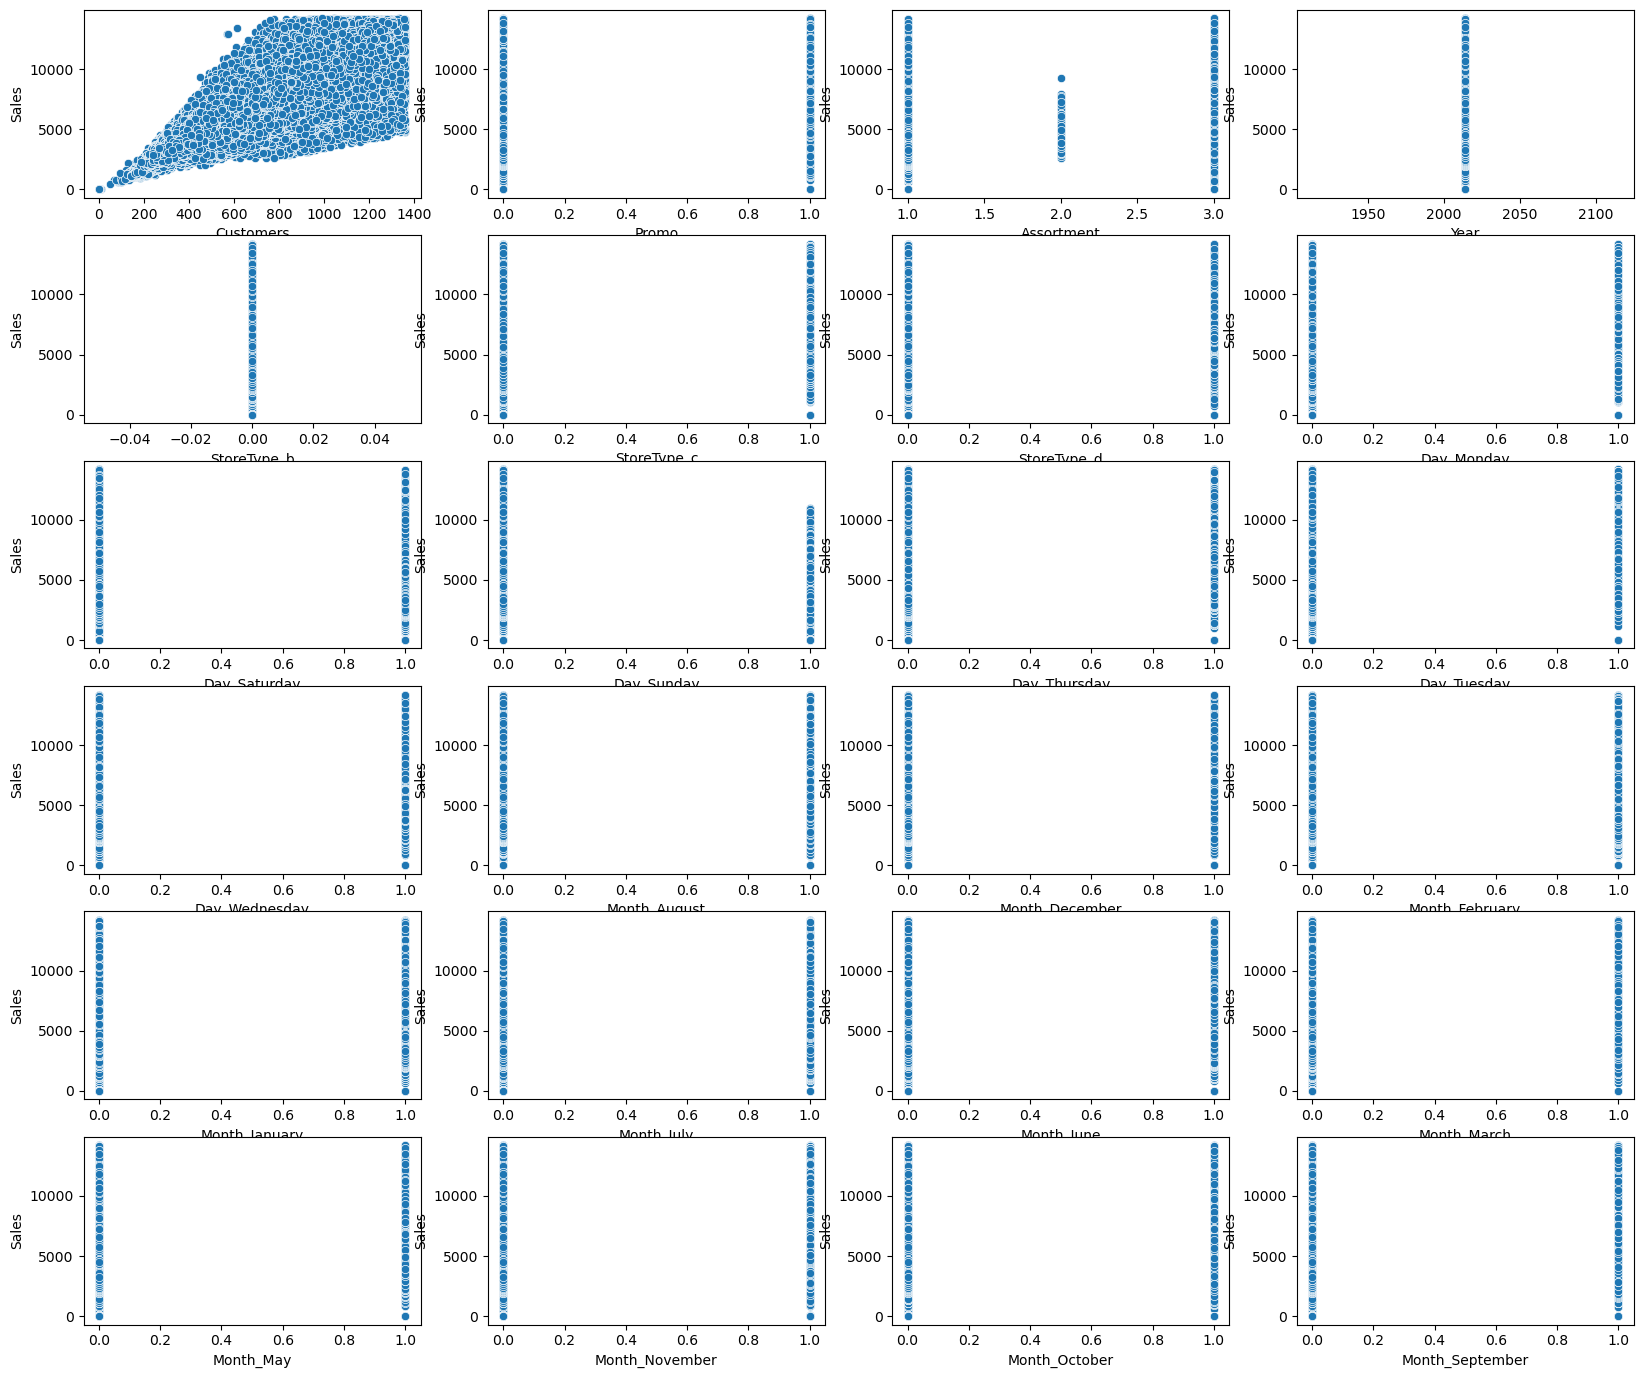

In [32]:
# Realizar un pairplot entre todas las variables independientes y la variable objetivo. Serán 4 columnas y tantas filas como sean necesarias.
def create_pairplot(df, target_column, independent_columns):
    
    # Numero de columnas
    n_cols = 4
    # Número de filas 
    n_rows = len(independent_columns) // n_cols + 1

    # Tamaño de la figura
    plt.figure(figsize=(20, 20))

    # Realizar pairplot de variable objetivo vs cada variable independiente
    for i, column in enumerate(independent_columns):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.scatterplot(x=df[df[column] <= np.percentile(df[column], 99)][column], y=df[target_column]) # Los visualizamon sin los outliers restantes para ver mejor la relación

    plt.show()

create_pairplot(merged_data, "Sales", merged_data.drop("Sales", axis=1).columns)

In [33]:
merged_data.columns

Index(['Sales', 'Customers', 'Promo', 'Assortment', 'Year', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Day_Monday', 'Day_Saturday',
       'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday',
       'Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September'],
      dtype='object')

In [34]:
# En este caso definitivamente hay una relación lineal entre costumers y la variable objetivo. Con las demás variables presentes
# No tenemos total certeza. Así que para ello utilizarmos otro método de escogencia de variables llamado OSL

formula = f"Sales ~ {' + '.join(merged_data.drop('Sales', axis=1).columns)}"

# Ajustar el modelo de regresión
model = smf.ols(formula, data=merged_data).fit()

# Mostrar un resumen de los resultados del modelo
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 1.366e+05
Date:                Thu, 12 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:36:16   Log-Likelihood:            -2.9196e+06
No. Observations:              348663   AIC:                         5.839e+06
Df Residuals:                  348639   BIC:                         5.840e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6.164e-05   2.37e-06    -

Las variables estadisticamente significativas en esta regresion son aquellas con p-value menor a 0.05. Estas son:
-Customers: Su p-value es 0.000, lo que indica que es altamente significativa.
- Promo
- Assortment
- StoreType_b
- StoreType_c
- StoreType_d
- Day_Monday
- Day_Saturday
- Day_Sunday
- Day_Thursday
- Day_Tuesday: Esta no pero la dejamos par interpretar mejor los resultados
- Day_Wednesday: Esta no pero la dejamos par interpretar mejor los resultados
- Year: Esta variable se escoge para hacer distinciones por año en el entrenamiento de los datos

In [37]:
merged_data = merged_data[['Sales', 'Promo', 'Year',
                           'Assortment', 'StoreType_b', 'StoreType_c', 'StoreType_d', 
                           'Day_Monday', 'Day_Tuesday', 'Day_Wednesday', 'Day_Thursday', 'Day_Saturday', 'Day_Sunday',
                        ]]

In [42]:
X = merged_data.drop('Sales', axis=1)

y = merged_data['Sales']

# Dividir el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

*Nota: Por facilidad de interpretaciónd de los resultados del algoritmo, decidimos no estandarizar los datos que se encuentran presentes en el modelo*

In [43]:
models  = [] 

anios = X["Year"].unique()

for anio in anios:

    # Filtrar los datos de entrenamiento para el año actual
    X_train_anio = X_train[X_train["Year"] == anio]
    y_train_anio = y_train[X_train["Year"] == anio]

    # Filtrar los datos de prueba para el año actual
    X_test_anio = X_test[X_test["Year"] == anio]
    y_test_anio = y_test[X_test["Year"] == anio]

    # Crear el modelo de regresión lineal
    model = LinearRegression()

    # Entrenar el modelo
    model.fit(X_train_anio, y_train_anio)

    # Predecir los valores de ventas para los datos de prueba
    y_pred = model.predict(X_test_anio)

    # Calcular el error cuadrático medio
    mse = mean_squared_error(y_test_anio, y_pred)

    # Calcular el coeficiente de determinación
    r2 = r2_score(y_test_anio, y_pred)

    # Guardar los resultados
    models.append({
        "year": anio,
        "model": model,
        "mse": mse,
        "r2": r2
    })


In [46]:
# Imprimo las métricas de cada modelo en cada año
for model in models:
    print(f"Modelo para el año {model['year']}")
    print(f"MSE: {model['mse']}")
    print(f"RMSE: {np.sqrt(model['mse'])}")
    print(f"R2: {model['r2']}")
    print()

Modelo para el año 2014
MSE: 4905426.432821267
RMSE: 2214.8197291927095
R2: 0.5540781066100937



In [45]:
# Mostrar coeficientes junto con los nombres de las variables por cada año
for model in models:
    print(f"Modelo para el año {model['year']}")
    print(pd.DataFrame({
        "coef": model['model'].coef_,
        "name": X_train.columns
    }))
    print()

Modelo para el año 2014
            coef           name
0   2.173286e+03          Promo
1   4.547474e-13           Year
2   2.501844e+02     Assortment
3   8.266064e+02    StoreType_b
4   3.014151e+01    StoreType_c
5   1.058506e+02    StoreType_d
6   8.010241e+02     Day_Monday
7   4.218238e+02    Day_Tuesday
8  -8.372295e+01  Day_Wednesday
9  -4.219849e+02   Day_Thursday
10  3.131768e+02   Day_Saturday
11 -5.153051e+03     Day_Sunday



**Explique si los resultados del modelo serían, de acuerdo
a su criterio, suficientes para el uso de dicho modelo por parte de la empresa.**

- En este caso, R2 es 0.5541, lo que significa que el modelo explica aproximadamente el 55.41% de la variabilidad en las ventas. Dependiendo del contexto, un R2 de 0.5541 podría ser considerado moderado. 
- el RMSE es de 2214 aproximadamente .Podríamos describir este valor como moderado, si estamos prediciendo ventas y estas ventas varían típicamente en decenas de miles o más como es este caso, un RMSE de 2214 es aceptable

En general el modelo es aceptable, aunque la empresa debe tener en cuenta que es una herramienta mediante la cual se pueden guiar para tomar decisiones, más no una herramienta que predice con exactitud las ventas de una tienda.

Se recomienda que la empresa Droguerías Los Alpes se guie de este modelo con cierta cautela y de esta manera puede ser una herramienta útil para tomar decisiones.

**Responda a la pregunta: Asumiendo que el mejor modelo obtenido es suficiente en términos de capacidad de predicción y validación de supuestos, ¿cuál es el impacto promedio en la ventas de una sucursal si se decide establecer una
promoción y adicionalmente si dicha promoción se aplica un fin de semana?**


El coeficiente para "Promo" es 2.173286e+03. Esto indica que, en promedio, establecer una promoción en una sucursal incrementaría las ventas en 2173.286 unidades (suponiendo que todas las demás variables se mantienen constantes).

Para evaluar el impacto adicional de tener una promoción durante el fin de semana, necesitamos considerar tanto el coeficiente de "Promo" como los coeficientes de "Day_Saturday" y "Day_Sunday".

Si la promoción se aplica un sábado: El incremento total en ventas sería la suma del coeficiente de "Promo" y el coeficiente de "Day_Saturday", es decir: 2173.286 + 313.1768 = 2486.4628

Si la promoción se aplica un domingo: El incremento total en ventas sería la suma del coeficiente de "Promo" y el coeficiente de "Day_Sunday" (que es negativo, indicando una disminución en ventas): 2173.286 − 5153.051= -2979.765

Esto indica que, aunque la promoción podría incrementar las ventas, el hecho de que sea domingo tiene un impacto negativo mucho más significativo, llevando a una disminución neta en ventas de 2979.765 unidades en promedio.